## Data Analysis As Notebook File

Within this notebook all analysis of the data, as seen within data_analysis.py, is shown per analysis method. 

Firstly the needed imports and the data is read into numpy arrays in a organised manner.

In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
from sys import platform
import os
#Wactch out: below module is not standard and should be installed using pip install tabulate
from tabulate import tabulate

if platform == "linux" or platform == "linux2" or platform == "darwin":
    HMC_directory = "../HMC_DATA"
    Heatbath_directory = "../HEATBATH_DATA"
    MH_directory = "../MH_DATA"
elif platform == "win32":
    HMC_directory = "..\HMC_DATA"
    Heatbath_directory = "..\HEATBATH_DATA"
    MH_directory = "..\MH_DATA"


HMC_DATA = np.empty((3,15,11,6))

for file in os.scandir(HMC_directory):
    if file.is_file():
        with open(file.path) as f:                
            data_dict = json.load(f)
            w = data_dict["parameters"]["w"]
            l = data_dict["parameters"]["l"]
            HMC_DATA[int(l*2 - 2)][w-3] = np.array(data_dict["full_results"])

HEATBATH_DATA = np.empty((3,10,11,5))

for file in os.scandir(Heatbath_directory):
    if file.is_file():
        with open(file.path) as f:                
            data_dict = json.load(f)
            w = data_dict["parameters"]["w"]
            l = data_dict["parameters"]["l"]
            HEATBATH_DATA[int(l*2 - 2)][w-3] = np.array(data_dict["full_results"])



MH_DATA = np.empty((3,8,11,6))

for file in os.scandir(MH_directory):
    if file.is_file():
        with open(file.path) as f:                
            data_dict = json.load(f)
            w = data_dict["parameters"]["w"]
            l = data_dict["parameters"]["l"]
            MH_DATA[int(l*2 - 2)][w-3] = np.array(data_dict["full_results"])



The next part of the code is used to plot the estimated time per measurement. 

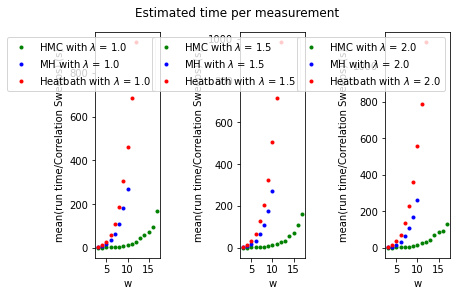

In [3]:
def meas_time_check(w_check, lamb):
    ratio = []
    for r in HMC_DATA[lamb][w_check -3]:
        ratio.append(r[-1]/int((r[-2]+ 1)/2))  
    HMC = np.mean(ratio)
    if w_check < len(HEATBATH_DATA[lamb]) + 3:
        ratio = []
        for r in HEATBATH_DATA[lamb][w_check -3]:
            ratio.append(r[-1]/int((r[-2]+ 1)/2))
        Heatbath = np.mean(ratio) 
    else:
        Heatbath = np.inf    

    if w_check < len(MH_DATA[lamb]) + 3 :
        ratio = []
        for r in MH_DATA[lamb][w_check -3]:
            ratio.append(r[-1]/int((r[-2]+ 1)/2)) 
        MH = np.mean(ratio)
    else:
        MH = np.inf
    return [HMC, Heatbath, MH]

def plot_all_lamb():
    fig, axs = plt.subplots(1,3, constrained_layout = True)
    lamb = 0
    values = np.array([meas_time_check(w,lamb) for w in range(3,18)])
    values_HMC = values[:,0]
    values_Heatbath = values[:,1][:10]
    values_MH = values[:,2][:8]

    lamb = (lamb + 2)/2

    axs[0].plot([index + 3 for index, _ in enumerate(values_HMC)], values_HMC, label = r"HMC with $\lambda$ = " + str(lamb), color = "green", marker = ".", linestyle = 'None')
    axs[0].plot([index + 3 for index, _ in enumerate(values_MH)], values_MH, label = r"MH with $\lambda$ = " + str(lamb), color = "blue", marker = ".", linestyle = 'None')
    axs[0].plot([index + 3 for index, _ in enumerate(values_Heatbath)], values_Heatbath, label = r"Heatbath with $\lambda$ = " + str(lamb), color = "red", marker = ".", linestyle = 'None')
    axs[0].legend()
    axs[0].set_xlabel(r"w")
    axs[0].set_ylabel("mean(run time/Correlation Sweeps) (s)")

    lamb = 1 
    values = np.array([meas_time_check(w,lamb) for w in range(3,18)])
    values_HMC = values[:,0]
    values_Heatbath = values[:,1][:10]
    values_MH = values[:,2][:8]

    lamb = (lamb + 2)/2

    axs[1].plot([index + 3 for index, _ in enumerate(values_HMC)], values_HMC, label = r"HMC with $\lambda$ = " + str(lamb), color = "green", marker = ".", linestyle = 'None')
    axs[1].plot([index + 3 for index, _ in enumerate(values_MH)], values_MH, label = r"MH with $\lambda$ = " + str(lamb), color = "blue", marker = ".", linestyle = 'None')
    axs[1].plot([index + 3 for index, _ in enumerate(values_Heatbath)], values_Heatbath, label = r"Heatbath with $\lambda$ = " + str(lamb), color = "red", marker = ".", linestyle = 'None')
    axs[1].legend()
    axs[1].set_xlabel(r"w")
    axs[1].set_ylabel("mean(run time/Correlation Sweeps) (s)")

    lamb = 2
    values = np.array([meas_time_check(w,lamb) for w in range(3,18)])
    values_HMC = values[:,0]
    values_Heatbath = values[:,1][:10]
    values_MH = values[:,2][:8]

    lamb = (lamb + 2)/2

    axs[2].plot([index + 3 for index, _ in enumerate(values_HMC)], values_HMC, label = r"HMC with $\lambda$ = " + str(lamb), color = "green", marker = ".", linestyle = 'None')
    axs[2].plot([index + 3 for index, _ in enumerate(values_MH)], values_MH, label = r"MH with $\lambda$ = " + str(lamb), color = "blue", marker = ".", linestyle = 'None')
    axs[2].plot([index + 3 for index, _ in enumerate(values_Heatbath)], values_Heatbath, label = r"Heatbath with $\lambda$ = " + str(lamb), color = "red", marker = ".", linestyle = 'None')
    axs[2].legend()
    axs[2].set_xlabel(r"w")
    axs[2].set_ylabel("mean(run time/Correlation Sweeps) (s)")
    plt.suptitle("Estimated time per measurement")
    plt.show()
plot_all_lamb()

The following code does something similar, but then not for the estimated time per measurement, but for the total running time

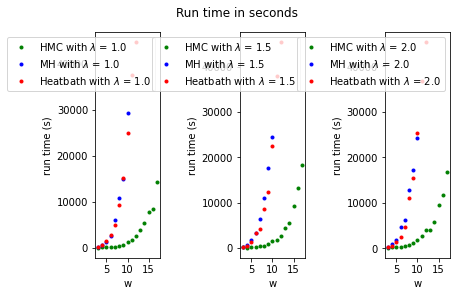

In [4]:
def plot_all_lamb_run_time():
    fig, axs = plt.subplots(1,3, constrained_layout = True)
    lamb = 0
    def determine_run_times(lamb):
        HMC_values = np.sum(HMC_DATA[lamb,:,:,5], axis = 1)
        Heatbath_values = np.sum(HEATBATH_DATA[lamb,:,:,4], axis = 1)
        MH_values = np.sum(MH_DATA[lamb,:,:,5], axis = 1)
        return HMC_values, Heatbath_values[:10], MH_values[:8]
    values_HMC ,values_Heatbath, values_MH = determine_run_times(lamb)

    lamb = (lamb + 2)/2

    axs[0].plot([index + 3 for index, _ in enumerate(values_HMC)], values_HMC, label = r"HMC with $\lambda$ = " + str(lamb), color = "green", marker = ".", linestyle = 'None')
    axs[0].plot([index + 3 for index, _ in enumerate(values_MH)], values_MH, label = r"MH with $\lambda$ = " + str(lamb), color = "blue", marker = ".", linestyle = 'None')
    axs[0].plot([index + 3 for index, _ in enumerate(values_Heatbath)], values_Heatbath, label = r"Heatbath with $\lambda$ = " + str(lamb), color = "red", marker = ".", linestyle = 'None')
    axs[0].legend()
    axs[0].set_xlabel(r"w")
    axs[0].set_ylabel("run time (s)")

    lamb = 1 
    values_HMC ,values_Heatbath, values_MH = determine_run_times(lamb)

    lamb = (lamb + 2)/2

    axs[1].plot([index + 3 for index, _ in enumerate(values_HMC)], values_HMC, label = r"HMC with $\lambda$ = " + str(lamb), color = "green", marker = ".", linestyle = 'None')
    axs[1].plot([index + 3 for index, _ in enumerate(values_MH)], values_MH, label = r"MH with $\lambda$ = " + str(lamb), color = "blue", marker = ".", linestyle = 'None')
    axs[1].plot([index + 3 for index, _ in enumerate(values_Heatbath)], values_Heatbath, label = r"Heatbath with $\lambda$ = " + str(lamb), color = "red", marker = ".", linestyle = 'None')
    axs[1].legend()
    axs[1].set_xlabel(r"w")
    axs[1].set_ylabel("run time (s)")

    lamb = 2
    values_HMC ,values_Heatbath, values_MH = determine_run_times(lamb)

    lamb = (lamb + 2)/2

    axs[2].plot([index + 3 for index, _ in enumerate(values_HMC)], values_HMC, label = r"HMC with $\lambda$ = " + str(lamb), color = "green", marker = ".", linestyle = 'None')
    axs[2].plot([index + 3 for index, _ in enumerate(values_MH)], values_MH, label = r"MH with $\lambda$ = " + str(lamb), color = "blue", marker = ".", linestyle = 'None')
    axs[2].plot([index + 3 for index, _ in enumerate(values_Heatbath)], values_Heatbath, label = r"Heatbath with $\lambda$ = " + str(lamb), color = "red", marker = ".", linestyle = 'None')
    axs[2].legend()
    axs[2].set_xlabel(r"w")
    axs[2].set_ylabel("run time (s)")
    plt.suptitle(r"Run time in seconds")
    plt.show()
plot_all_lamb_run_time()

The next function plots the correlation time for a given "width". Note: here width means one edge of the lattice size. As such a width of 10 means a lattice size of $10^4$

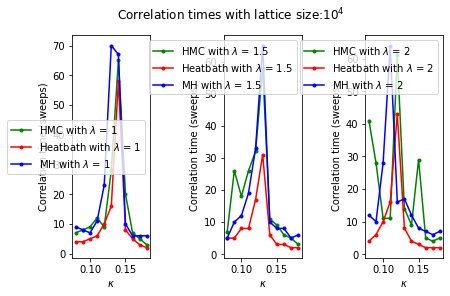

In [6]:
def correlation_time_plotjes(width):
    fig, axs = plt.subplots(1,3, constrained_layout = True)

    kappas = np.linspace(0.08,0.18,11)

    HMC_cor_1 = HMC_DATA[0,width -3,:,4] #groen
    Heatbath_cor_1 = HEATBATH_DATA[0,width -3,:,3] #rood
    MH_cor_1 = MH_DATA[0,width -3,:,4] #blauw

    axs[0].plot(kappas, HMC_cor_1, label = r"HMC with $\lambda$ = 1", color = "green", marker = ".")
    axs[0].plot(kappas, Heatbath_cor_1, label = r"Heatbath with $\lambda$ = 1", color = "red", marker = ".")
    axs[0].plot(kappas, MH_cor_1, label = r"MH with $\lambda$ = 1", color = "blue", marker = ".")
    axs[0].legend()
    axs[0].set_xlabel(r"$\kappa$")
    axs[0].set_ylabel("Correlation time (sweeps)")

    HMC_cor_15 = HMC_DATA[1,width -3,:,4] #groen
    Heatbath_cor_15 = HEATBATH_DATA[1,width -3,:,3] #rood
    MH_cor_15 = MH_DATA[1,width -3,:,4] #blauw

    axs[1].plot(kappas, HMC_cor_15, label = r"HMC with $\lambda$ = 1.5", color = "green", marker = ".")
    axs[1].plot(kappas, Heatbath_cor_15, label = r"Heatbath with $\lambda$ = 1.5", color = "red", marker = ".")
    axs[1].plot(kappas, MH_cor_15, label = r"MH with $\lambda$ = 1.5", color = "blue", marker = ".")
    axs[1].legend()
    axs[1].set_xlabel(r"$\kappa$")
    axs[1].set_ylabel("Correlation time (sweeps)")

    HMC_cor_2 = HMC_DATA[2,width -3,:,4] #groen
    Heatbath_cor_2 = HEATBATH_DATA[2,width -3,:,3] #rood
    MH_cor_2 = MH_DATA[2,width -3,:,4] #blauw

    axs[2].plot(kappas, HMC_cor_2, label = r"HMC with $\lambda$ = 2", color = "green", marker = ".")
    axs[2].plot(kappas, Heatbath_cor_2, label = r"Heatbath with $\lambda$ = 2", color = "red", marker = ".")
    axs[2].plot(kappas, MH_cor_2, label = r"MH with $\lambda$ = 2", color = "blue", marker = ".")
    axs[2].legend()
    axs[2].set_xlabel(r"$\kappa$")
    axs[2].set_ylabel("Correlation time (sweeps)")
    plt.suptitle(r"Correlation times with lattice size:${}^4$".format(width))

    plt.show()
correlation_time_plotjes(10)

The following code block will create the tables used within the report. All titles speak for themselves, apart from vergelijker. This created table 1 within the report. For the first two it should be noted that the table are created per lambda value. Where 0, 1,2 corresponds to 1,1.5,2

In [7]:

def run_time_tabellen(lamb):
    print("HMC: \n ")
    print(tabulate(HMC_DATA[lamb,:,:,5], tablefmt= "latex", floatfmt=".0f"))
    print("Heatbath : \n")
    print(tabulate(HEATBATH_DATA[lamb,:,:,4], tablefmt= "latex", floatfmt=".0f"))
    print("MH: \n")
    print(tabulate(MH_DATA[lamb,:,:,5], tablefmt= "latex", floatfmt=".0f"))
run_time_tabellen(1)

HMC: 
 
\begin{tabular}{rrrrrrrrrrr}
\hline
    5 &    8 &   11 &   16 &   35 &   26 &    5 &   5 &   5 &    2 &   2 \\
   14 &    7 &   12 &   12 &   14 &   22 &    9 &   7 &   5 &    5 &   2 \\
    9 &   21 &   19 &   40 &   27 &   62 &   15 &   7 &   7 &    7 &   7 \\
   21 &   21 &   33 &   54 &   51 &   11 &    8 &  33 &   6 &    8 &   6 \\
   17 &   75 &   32 &   21 &   56 &   63 &   25 &  25 &   9 &    9 &   9 \\
   28 &   54 &   59 &   59 &   95 &  109 &   37 &  57 &  17 &   12 &  12 \\
   38 &   82 &   47 &   99 &   99 &  299 &   90 &  47 &  29 &   29 &  21 \\
   65 &  201 &  141 &  202 &  247 &  442 &   96 &  81 &  51 &   51 &  36 \\
  162 &  164 &  164 &  163 &  298 &  452 &  143 & 143 &  66 &   65 &  46 \\
  111 &  214 &  291 &  214 &  316 &  801 &  163 & 265 &  86 &   87 &  36 \\
  242 &  113 &  639 &  244 & 1033 &  897 &  177 & 241 & 176 &  143 & 559 \\
  285 &  396 &  343 &  343 &  717 & 1828 &  326 & 876 & 271 &  121 &  71 \\
  428 &  298 &  970 & 1171 & 2378 & 1832 &  

In [8]:
def acceptance_tabellen(lamb):
    print("HMC: \n ")
    print(tabulate(HMC_DATA[lamb,:,:,1], tablefmt= "latex", floatfmt=".2f"))
    print("MH: \n")
    print(tabulate(MH_DATA[lamb,:,:,1], tablefmt= "latex", floatfmt=".2f"))

acceptance_tabellen(1)

HMC: 
 
\begin{tabular}{rrrrrrrrrrr}
\hline
 0.88 & 0.87 & 0.87 & 0.88 & 0.87 & 0.86 & 0.85 & 0.83 & 0.81 & 0.82 & 0.82 \\
 0.80 & 0.80 & 0.80 & 0.78 & 0.79 & 0.77 & 0.76 & 0.74 & 0.73 & 0.70 & 0.72 \\
 0.74 & 0.73 & 0.74 & 0.74 & 0.72 & 0.70 & 0.68 & 0.65 & 0.63 & 0.62 & 0.60 \\
 0.69 & 0.68 & 0.68 & 0.68 & 0.68 & 0.65 & 0.61 & 0.60 & 0.58 & 0.56 & 0.54 \\
 0.73 & 0.74 & 0.72 & 0.72 & 0.73 & 0.69 & 0.68 & 0.64 & 0.62 & 0.64 & 0.62 \\
 0.74 & 0.73 & 0.74 & 0.72 & 0.72 & 0.70 & 0.67 & 0.64 & 0.63 & 0.64 & 0.63 \\
 0.56 & 0.57 & 0.56 & 0.56 & 0.56 & 0.51 & 0.48 & 0.44 & 0.45 & 0.41 & 0.35 \\
 0.70 & 0.69 & 0.69 & 0.69 & 0.69 & 0.66 & 0.62 & 0.60 & 0.60 & 0.59 & 0.55 \\
 0.64 & 0.63 & 0.64 & 0.62 & 0.62 & 0.59 & 0.55 & 0.54 & 0.50 & 0.46 & 0.48 \\
 0.58 & 0.57 & 0.58 & 0.57 & 0.55 & 0.52 & 0.48 & 0.46 & 0.44 & 0.44 & 0.44 \\
 0.52 & 0.53 & 0.50 & 0.49 & 0.49 & 0.44 & 0.41 & 0.37 & 0.34 & 0.34 & 0.32 \\
 0.61 & 0.60 & 0.60 & 0.59 & 0.58 & 0.55 & 0.51 & 0.47 & 0.49 & 0.41 & 0.44 \\
 0.54 & 

In [12]:
def vergelijker():
    widths = np.linspace(3,12,10).astype(int)
    lambdas = np.linspace(0,2,3).astype(int)

    tabel = np.empty((3,10))

    for lamb in lambdas:
        for width in widths:
            HMC_time = np.sum(HMC_DATA[lamb,width-3,:,5])
            HB_time = np.sum(HEATBATH_DATA[lamb,width-3,:,4])
            if width <=10:
                MH_time = np.sum(MH_DATA[lamb,width -3,:,5])
            else:
                MH_time = np.inf
            if MH_time < HB_time:
                best = MH_time
            else:
                best = HB_time
            tabel[lamb][width-3] = best/HMC_time
    print(tabulate(tabel, tablefmt= "latex", floatfmt=".2f"))
vergelijker()

\begin{tabular}{rrrrrrrrrr}
\hline
 2.92 & 4.38 & 10.07 & 14.28 & 29.30 & 22.83 & 21.51 & 21.37 & 23.10 & 17.47 \\
 1.48 & 4.18 &  6.02 & 13.00 & 12.28 & 15.93 & 14.17 & 13.97 & 20.35 & 17.59 \\
 1.82 & 2.98 &  7.21 &  6.79 &  9.58 & 14.97 & 13.65 & 13.98 & 14.34 & 11.42 \\
\hline
\end{tabular}


In [10]:
def finetuned_values_table():    
    if platform == "linux" or platform == "linux2" or platform == "darwin":
        with open('./Heatbath_finetuned_values.json') as f:
            delta_values = json.load(f)
        with open('./HMC_finetuned_values.json') as g:
            eps_taus_values = json.load(g)
    elif platform == "win32":
        with open('.\Heatbath_finetuned_values.json') as f:
            delta_values = json.load(f)
        with open('.\HMC_finetuned_values.json') as g:
            eps_taus_values = json.load(g)


    deltas = np.array(delta_values['fine_tuned_values'])
    deltas = deltas[:len(deltas)-2]
    new_deltas = np.empty((3,12))
    eps_taus = np.array(eps_taus_values['fine_tuned_values'])

    for delta in deltas:
        width = delta[0]
        lamb = delta[1]
        new_deltas[int((lamb*2) - 2)][int(width-3)] = delta[2]

    new_eps = np.empty((3,15))
    new_taus = np.empty((3,15))
    for pars in eps_taus:
        width = pars[0]
        lamb = pars[1]
        new_eps[int((lamb*2) - 2)][int(width-3)] = pars[2]
        new_taus[int((lamb*2) - 2)][int(width-3)] = pars[3]
    
    print("Delta: \n")
    print(tabulate(new_deltas, tablefmt= "latex", floatfmt=".1f"))
    print("Epsilon: \n")
    print(tabulate(new_eps, tablefmt= "latex", floatfmt=".2f"))
    print("Taus: \n")
    print(tabulate(new_taus, tablefmt= "latex", floatfmt=".0f"))
finetuned_values_table()

Delta: 

\begin{tabular}{rrrrrrrrrrrr}
\hline
 1.7 & 1.5 & 1.7 & 1.7 & 1.7 & 1.7 & 1.9 & 1.9 & 1.7 & 1.7 & 1.9 & 1.7 \\
 1.3 & 1.3 & 1.5 & 1.5 & 1.5 & 1.5 & 1.5 & 1.7 & 1.5 & 1.5 & 1.5 & 1.5 \\
 1.3 & 1.3 & 1.3 & 1.3 & 1.3 & 1.3 & 1.3 & 1.3 & 1.3 & 1.3 & 1.3 & 1.3 \\
\hline
\end{tabular}
Epsilon: 

\begin{tabular}{rrrrrrrrrrrrrrr}
\hline
 0.12 & 0.12 & 0.12 & 0.12 & 0.10 & 0.08 & 0.08 & 0.07 & 0.07 & 0.06 & 0.05 & 0.05 & 0.05 & 0.05 & 0.04 \\
 0.12 & 0.12 & 0.11 & 0.10 & 0.08 & 0.07 & 0.08 & 0.06 & 0.06 & 0.06 & 0.06 & 0.05 & 0.05 & 0.04 & 0.04 \\
 0.12 & 0.12 & 0.11 & 0.09 & 0.08 & 0.08 & 0.06 & 0.06 & 0.05 & 0.05 & 0.05 & 0.04 & 0.04 & 0.04 & 0.04 \\
\hline
\end{tabular}
Taus: 

\begin{tabular}{rrrrrrrrrrrrrrr}
\hline
 8 & 8 & 8 &  8 & 10 & 13 & 13 & 14 & 14 & 17 & 20 & 20 & 20 & 20 & 25 \\
 8 & 8 & 9 & 10 & 13 & 14 & 13 & 17 & 17 & 17 & 17 & 20 & 20 & 25 & 25 \\
 8 & 8 & 9 & 11 & 13 & 13 & 17 & 17 & 20 & 20 & 20 & 25 & 25 & 25 & 25 \\
\hline
\end{tabular}


The last block of code creates the plots, for a specified width, of the distribution over different kappas of the mean field value. These were used as a check of the detailed balance condition. The optional bigger_error multiplies the errors with a specified value in order to make them more visible.

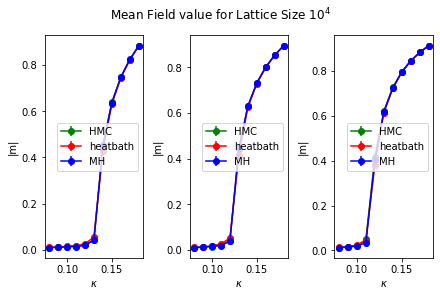

In [11]:
def detailed_balance_check(width, bigger_error = 1):
    c = bigger_error
    #Detailed balance is checked for the highest value that all three methods have full calculations for.
    kappas = HMC_DATA[1,1,:,0]
    HMC_values_0 = HMC_DATA[0,(width -3),:,2]
    HMC_errors_0 = c * HMC_DATA[0,(width -3),:,3]
    HEATBATH_values_0 = HEATBATH_DATA[0,(width -3),:,1]
    HEATBATH_errors_0 = c * HEATBATH_DATA[0,(width -3),:,2]
    MH_values_0 = MH_DATA[0,(width -3),:,2]
    MH_errors_0 = c * MH_DATA[0,(width -3),:,3]

    HMC_values_1 = HMC_DATA[1,(width -3),:,2]
    HMC_errors_1 = c * HMC_DATA[1,(width -3),:,3]
    HEATBATH_values_1 = HEATBATH_DATA[1,(width -3),:,1]
    HEATBATH_errors_1 = c * HEATBATH_DATA[1,(width -3),:,2]
    MH_values_1 = MH_DATA[1,(width -3),:,2]
    MH_errors_1 = c * MH_DATA[1,(width -3),:,3]

    HMC_values_2 = HMC_DATA[2,(width -3),:,2]
    HMC_errors_2 = c * HMC_DATA[2,(width -3),:,3]
    HEATBATH_values_2 = HEATBATH_DATA[2,(width -3),:,1]
    HEATBATH_errors_2 = c * HEATBATH_DATA[2,(width -3),:,2]
    MH_values_2 = MH_DATA[2,(width -3),:,2]
    MH_errors_2 = c * MH_DATA[2,(width -3),:,3]

    fig, axs = plt.subplots(1,3, constrained_layout = True)
    axs[0].errorbar(kappas,HMC_values_0,yerr=HMC_errors_0,fmt='-og')
    axs[0].errorbar(kappas,HEATBATH_values_0,yerr=HEATBATH_errors_0,fmt='-or')
    axs[0].errorbar(kappas,MH_values_0,yerr=MH_errors_0,fmt='-ob')
    axs[0].set_ylabel("|m|")
    axs[0].set_xlabel(r"$\kappa$")
    axs[0].legend(["HMC", "heatbath","MH"])

    axs[1].errorbar(kappas,HMC_values_1,yerr=HMC_errors_1,fmt='-og')
    axs[1].errorbar(kappas,HEATBATH_values_1,yerr=HEATBATH_errors_1,fmt='-or')
    axs[1].errorbar(kappas,MH_values_1,yerr=MH_errors_1,fmt='-ob')
    axs[1].set_ylabel("|m|")
    axs[1].set_xlabel(r"$\kappa$")
    axs[1].legend(["HMC", "heatbath","MH"])

    axs[2].errorbar(kappas,HMC_values_2,yerr=HMC_errors_2,fmt='-og')
    axs[2].errorbar(kappas,HEATBATH_values_2,yerr=HEATBATH_errors_2,fmt='-or')
    axs[2].errorbar(kappas,MH_values_2,yerr=MH_errors_2,fmt='-ob')
    axs[2].set_ylabel("|m|")
    axs[2].set_xlabel(r"$\kappa$")
    axs[2].legend(["HMC", "heatbath","MH"])



    plt.suptitle(r"Mean Field value for Lattice Size ${}^4$".format(width))
    plt.show()
detailed_balance_check(10)